In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: chod: command not found


In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:08<00:00, 20.1MB/s]


In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [72]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])

print(with_mask_files[-5:])

['with_mask_1074.jpg', 'with_mask_1315.jpg', 'with_mask_2825.jpg', 'with_mask_1394.jpg', 'with_mask_1810.jpg']
['with_mask_2374.jpg', 'with_mask_869.jpg', 'with_mask_952.jpg', 'with_mask_3682.jpg', 'with_mask_1337.jpg']


In [73]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])

print(without_mask_files[-5:])

['without_mask_1179.jpg', 'without_mask_3655.jpg', 'without_mask_569.jpg', 'without_mask_2715.jpg', 'without_mask_2689.jpg']
['without_mask_3686.jpg', 'without_mask_1200.jpg', 'without_mask_1643.jpg', 'without_mask_2316.jpg', 'without_mask_1889.jpg']


In [74]:
print('Number of with images:', len(with_mask_files))
print('Number of with images:', len(without_mask_files))

Number of with images: 3725
Number of with images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [75]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828


In [76]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [77]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [78]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

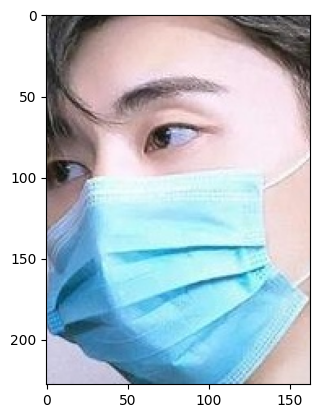

In [79]:
# displaying with mask image
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_1545.jpg')
plt.imshow(img)
plt.show()

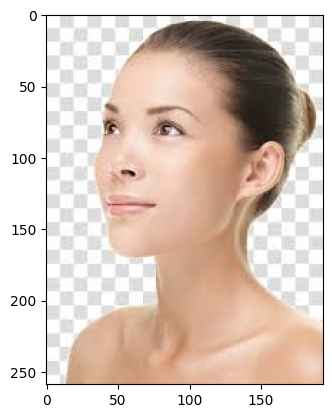

In [80]:
# displaying with mask image
img = mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_2925.jpg')
plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy array

In [81]:
# convert images to numpy arrays+

with_mask_path = '/content/face-mask-dataset/data/with_mask/' # Add a '/' at the end

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # Now the path is correct
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/face-mask-dataset/data/without_mask/' # Add a '/' at the end



for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file) # Now the path is correct
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [82]:
type(data)

list

In [83]:
len(data)

7553

array([[[33, 23, 22],
        [33, 23, 22],
        [33, 23, 22],
        ...,
        [16, 10, 12],
        [16, 10, 12],
        [16, 10, 12]],

       [[33, 23, 22],
        [34, 24, 23],
        [35, 25, 24],
        ...,
        [16, 10, 12],
        [16, 10, 12],
        [16, 10, 12]],

       [[35, 26, 25],
        [36, 27, 25],
        [38, 28, 27],
        ...,
        [17, 10, 11],
        [17, 10, 11],
        [17, 10, 11]],

       ...,

       [[15, 17, 12],
        [16, 17, 12],
        [18, 19, 14],
        ...,
        [11, 10,  8],
        [ 9,  9,  7],
        [ 9,  9,  7]],

       [[14, 14,  9],
        [15, 15, 10],
        [16, 17, 12],
        ...,
        [10,  9,  8],
        [ 9,  9,  7],
        [ 9,  9,  7]],

       [[14, 13,  9],
        [15, 14, 10],
        [16, 15, 11],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  6],
        [ 8,  8,  6]]], dtype=uint8)
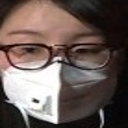

In [84]:
data[0]

In [85]:
type(data[0])

numpy.ndarray

In [86]:
data[0].shape

(128, 128, 3)

In [87]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [88]:
type(x)

numpy.ndarray

In [89]:
type(y)

numpy.ndarray

In [90]:
print(y)

[1 1 1 ... 0 0 0]


In [91]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [93]:
print(x.shape, xtrain.shape, xtest.shape)
print(y.shape, ytrain.shape, ytest.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [ ]:
# scaling the data

In [94]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255


array([[[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       [[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       [[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       ...,

       [[ 85, 152,  73],
        [ 85, 152,  73],
        [ 85, 152,  73],
        ...,
        [ 66,  64,  63],
        [ 46,  43,  40],
        [ 42,  39,  33]],

       [[ 83, 150,  71],
        [ 84, 151,  72],
        [ 84, 151,  72],
        ...,
        [ 86,  81,  83],
        [ 54,  47,  46],
        [ 46,  39,  35]],

       [[ 83, 150,  73],
        [ 84, 151,  74],
        [ 84, 151,  74],
        ...,
        [100,  94,  97],
        [ 61,  53,  53],
        [ 47,  38,  37]]], dtype=uint8)
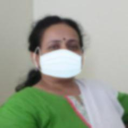

In [95]:
xtrain[0]

In [96]:
xtrain_scaled[0]

array([[[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       [[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       [[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       ...,

       [[0.33333333, 0.59607843, 0.28627451],
        [0.33333333, 0.59607843, 0.28627451],
        [0.33333333, 0

Building a Convolutional Neural Networks (CNN)

In [97]:
import tensorflow as tf
from tensorflow import keras

In [98]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [100]:
# training the neural network
history = model.fit(xtrain_scaled, ytrain, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - acc: 0.6926 - loss: 0.7095 - val_acc: 0.8926 - val_loss: 0.2899
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8753 - loss: 0.3235 - val_acc: 0.9041 - val_loss: 0.2444
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9087 - loss: 0.2377 - val_acc: 0.9091 - val_loss: 0.2334
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9233 - loss: 0.2074 - val_acc: 0.9240 - val_loss: 0.2091
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9337 - loss: 0.1752 - val_acc: 0.9306 - val_loss: 0.2056
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9512 - loss: 0.1277 - val_acc: 0.9273 - val_loss: 0.1920
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9509 - loss: 0.1164 - val_acc: 0.9273 - val_loss: 0.2137
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9696 - loss: 0.0843 - val_acc: 0.9223 - val_loss: 0.2222
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms

In [103]:
loss, accuracy = model.evaluate(xtest_scaled, ytest)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9364 - loss: 0.3504
Test Accuracy = 0.9417604207992554


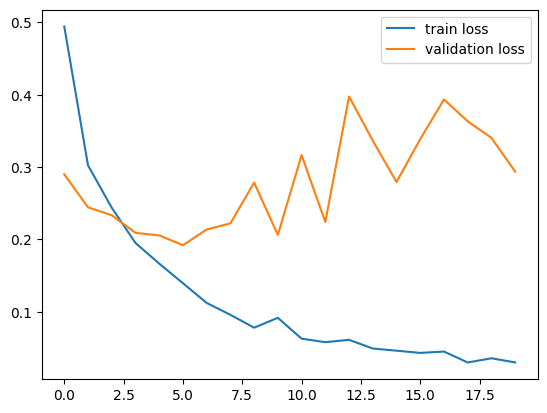

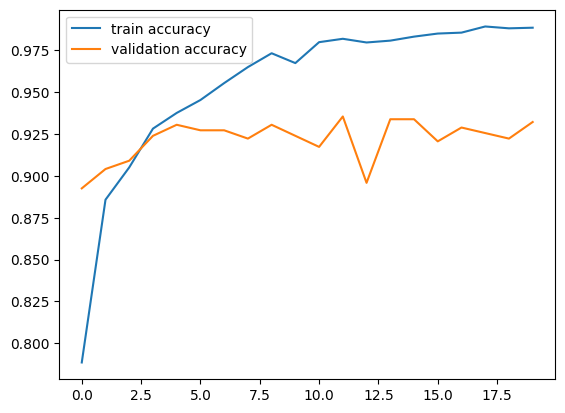

In [104]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test/without_mask_1027.jpg


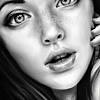

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.83769727 0.14995627]]
0
The person in the image is not wearing a mask


In [111]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test/with_mask_1011.jpg


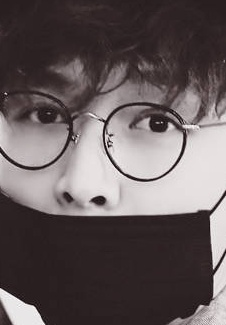

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.00301646 0.9938399 ]]
1
The person in the image is wearing a mask


In [113]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')